<a href="https://colab.research.google.com/github/pranavi158/Customer-Segmentation-with-Clustering/blob/main/Customer_Segmentation_with_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To directly go to Solutions...
https://colab.research.google.com/drive/1hXfIDQNd2_g6YdNRyDYsizB9cwfpL9yP#scrollTo=-AqJssdsYmBG&line=6&uniqifier=1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')

In [ ]:
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

Cloning into 'Datasets'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 335 (delta 22), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (335/335), 302.68 MiB | 14.81 MiB/s, done.
Resolving deltas: 100% (136/136), done.
Updating files: 100% (243/243), done.


In [ ]:
df = pd.read_csv('/content/Datasets/Mall Dataset/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


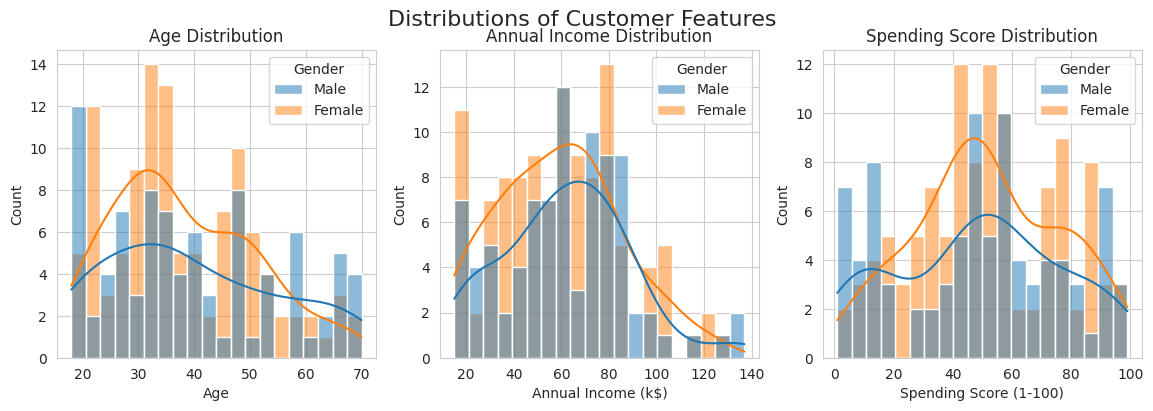

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

In [ ]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


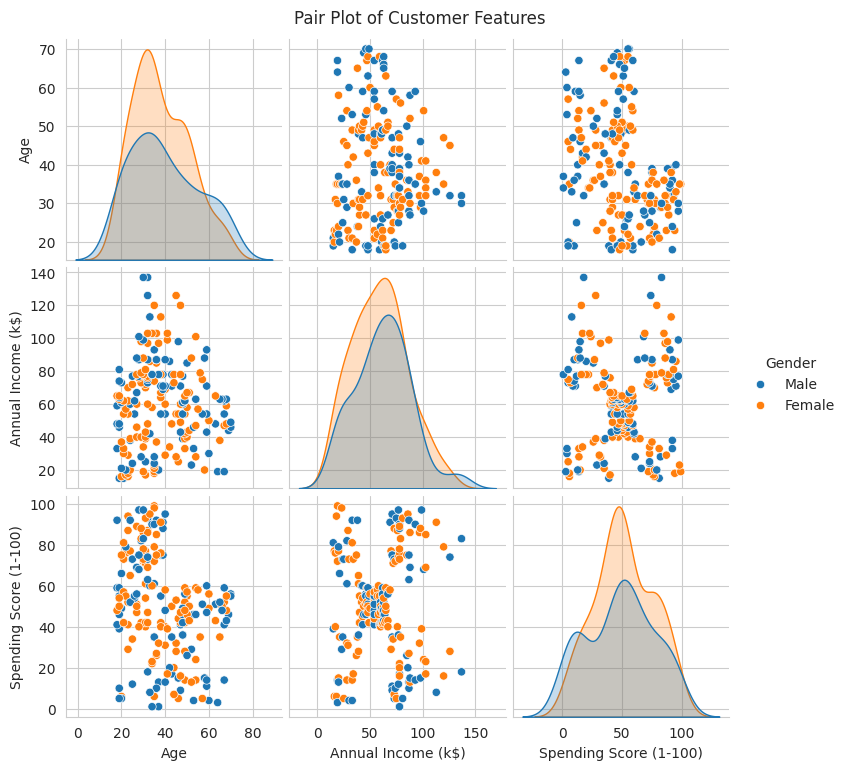

In [ ]:
sns.pairplot(df, vars=['Age','Annual Income (k$)','Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

In [ ]:
fig = px.scatter_3d(
    df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    z='Age',
    color='Gender',
    title='3d Visual'
)

fig.show()

In [ ]:
# 1. Select & Scale the values
X1 = df[['Annual Income (k$)','Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

In [ ]:
# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

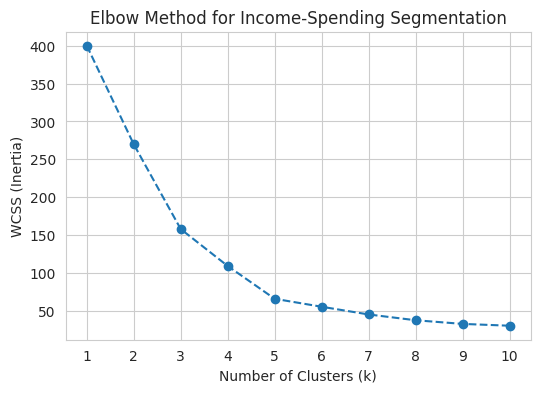

In [ ]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
kmeans1 = KMeans(n_clusters=5,init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


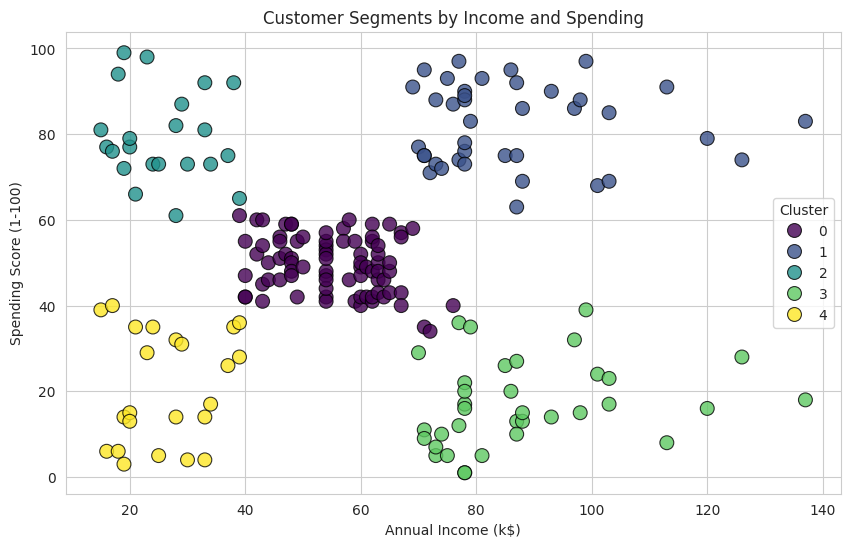

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


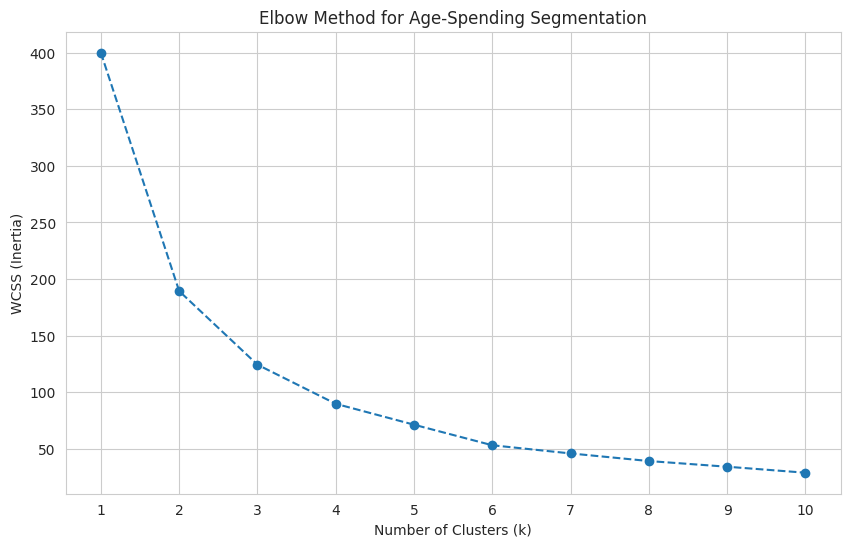

In [ ]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

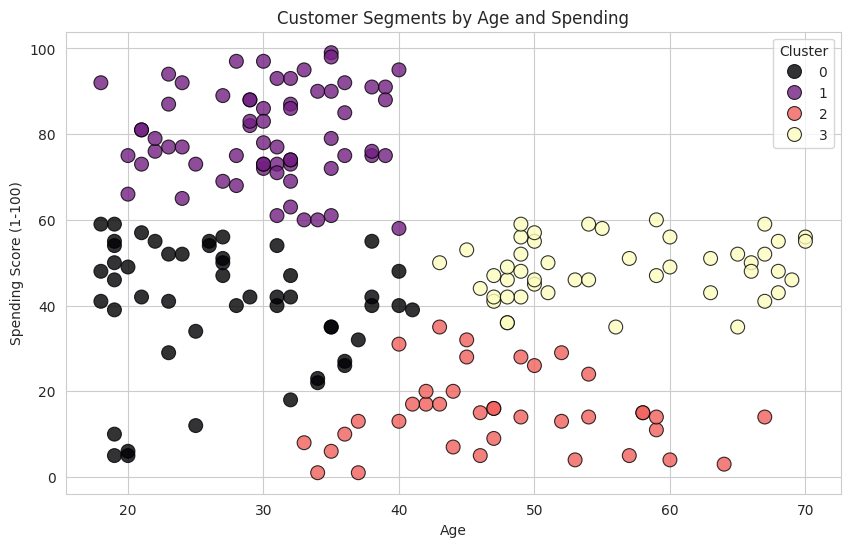

In [ ]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

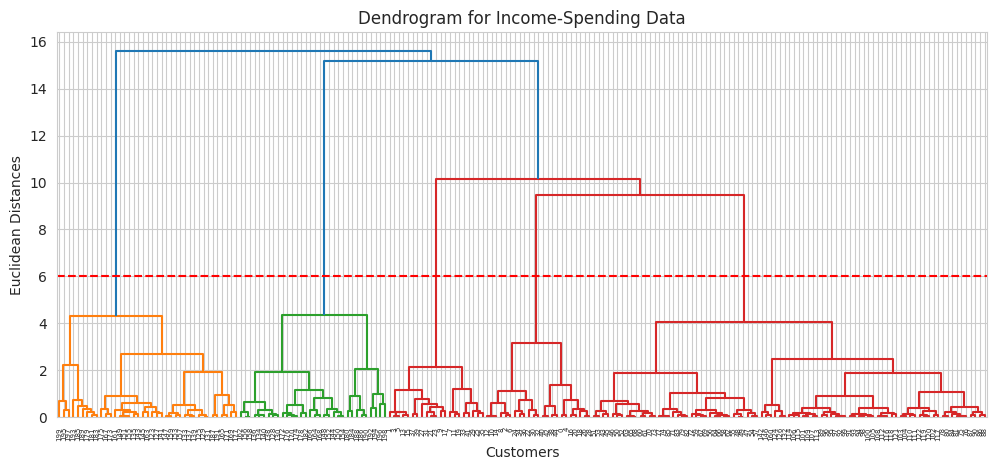

In [ ]:
plt.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

# Conclusion

In this extended project, we successfully applied unsupervised machine learning to perform customer segmentation.

**Key Steps Undertaken:**
1.  **Performed an in-depth EDA:** Used 2D and 3D plots to explore customer data from multiple angles.
2.  **Built two distinct segmentation models:** Created an income-based model and an age-based model, showing that segmentation is not a one-size-fits-all process.
3.  **Used the Elbow Method** to programmatically determine the optimal number of clusters for each scenario.
4.  **Introduced Hierarchical Clustering** as an alternative method and used its dendrogram to validate our choice of `k`.
5.  **Created quantitative, data-driven personas** for each segment, providing the marketing team with precise, actionable insights for targeted campaigns.

This project highlights how different clustering approaches can uncover different facets of customer behavior, providing a richer, more nuanced understanding than a single model alone.

# Submission
Submission Criteria
Based on the project objectives and the insights gained from the initial analysis, here are the key criteria for your submission:

1. Explore Gender vs. Spending Score: Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.
2. Apply Feature Engineering for Clustering: Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

#### 1. Explore Gender vs. Spending Score: Analyze the relationship between 'Gender' and 'Spending Score (1-100)' to see if gender plays a significant role in spending habits. Visualizations and summary statistics would be helpful here.

In [ ]:
df['gender_binary'] = df['Gender'].map({'Male': 1, 'Female': 0})

print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income_Cluster  \
0    Male   19                  15                      39               4   
1    Male   21                  15                      81               2   
2  Female   20                  16                       6               4   
3  Female   23                  16                      77               2   
4  Female   31                  17                      40               4   

   Age_Cluster  gender_binary  
0            0              1  
1            1              1  
2            0              0  
3            1              0  
4            0              0  


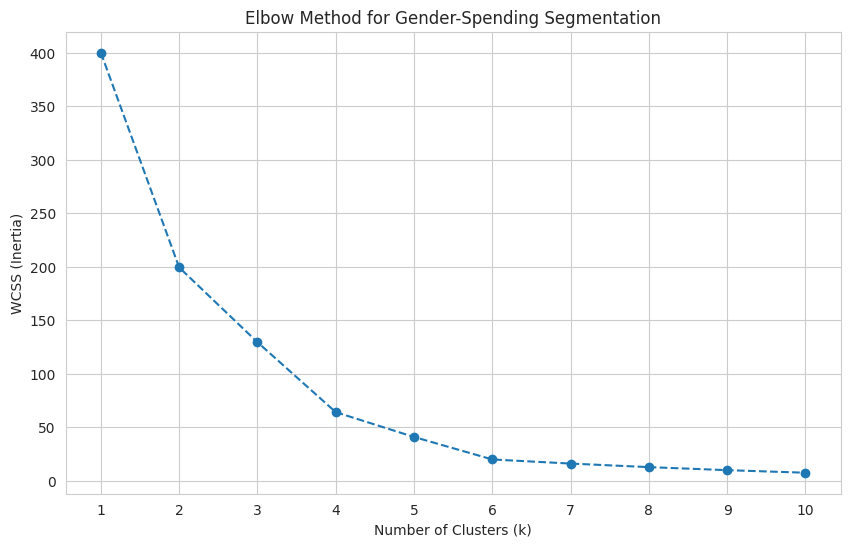

In [ ]:
# 1. Select and scale the features
X3 = df[['gender_binary', 'Spending Score (1-100)']]
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Gender-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=4,init='k-means++', random_state=42, n_init=10)
df['Gender_Cluster'] = kmeans3.fit_predict(X3_scaled)

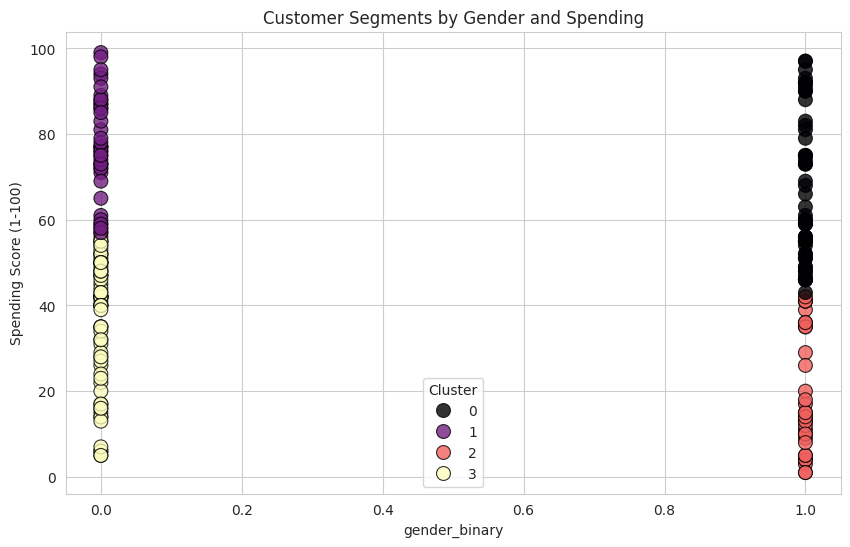

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gender_binary', y='Spending Score (1-100)',
                hue='Gender_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Gender and Spending')
plt.legend(title='Cluster')
plt.show()

#### Interpreting the Gender-Based Segments
This model gives us a different perspective:
- **Cluster 1 : High-Spending Females**: These are the most active or highest-spending female customers.
- **Cluster 3 Budget-Conscious Females**: This group represents females with more conservative spending habits.
- **Cluster 0 High-Spending Males**: This group covers a wide range but skews toward the top half of male spenders.
- **Cluster 2 Budget-Conscious Males**: These are the lower-spending male customers.

.

#### 2. Apply Feature Engineering for Clustering: Create a new feature using existing data (Feature Engineering). Then, explore if clustering can be effectively performed using this newly engineered feature in combination with one or more existing features. Document the feature engineering process, the chosen features for clustering, the determination of the optimal number of clusters (e.g., using the Elbow Method), and the resulting cluster visualization and interpretation.

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Age_Cluster,gender_binary,Gender_Cluster
0,Male,19,15,39,4,0,1,2
1,Male,21,15,81,2,1,1,0
2,Female,20,16,6,4,0,0,3
3,Female,23,16,77,2,1,0,1
4,Female,31,17,40,4,0,0,3


In [ ]:
df['Spending_Income_Ratio'] = df['Spending Score (1-100)'] / df['Annual Income (k$)']
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Age_Cluster,gender_binary,Gender_Cluster,Spending_Income_Ratio
0,Male,19,15,39,4,0,1,2,2.600000
1,Male,21,15,81,2,1,1,0,5.400000
2,Female,20,16,6,4,0,0,3,0.375000
3,Female,23,16,77,2,1,0,1,4.812500
4,Female,31,17,40,4,0,0,3,2.352941


In [ ]:
X4 = df[['Age', 'Spending_Income_Ratio']]
scaled4 = StandardScaler()
X4_scaled = scaled4.fit_transform(X4)

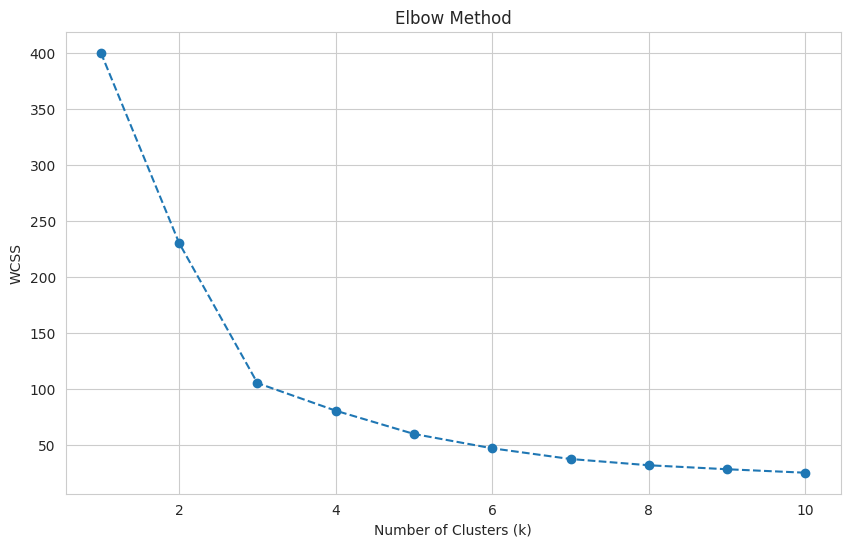

In [ ]:
wcss4 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X4_scaled)
    wcss4.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss4, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

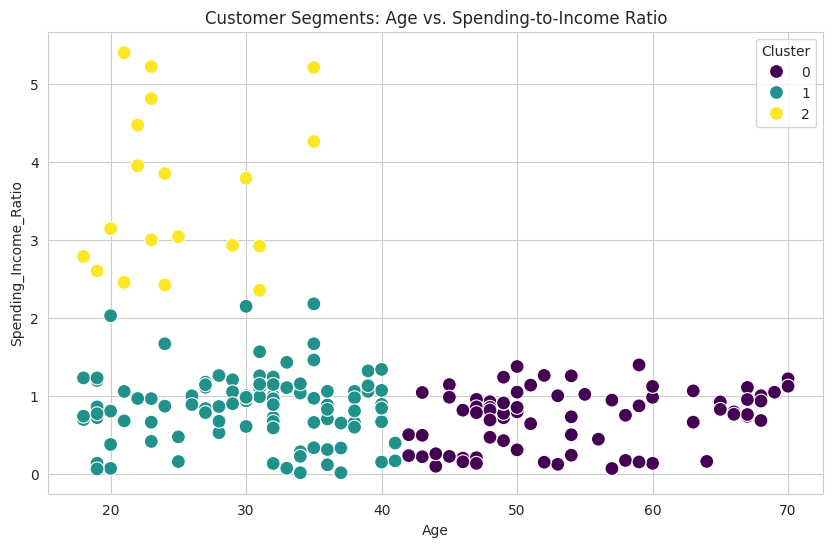

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X4_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Spending_Income_Ratio', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments: Age vs. Spending-to-Income Ratio')
plt.show()

#### Interpreting the Age-Spending&Income Ratio Segments
This model gives us a different perspective:
- **Cluster 2 — High-Propensity Youth**: Younger shoppers who spend the highest percentage of their income.

- **Cluster 1 — Balanced Young Adults**: A large group of 18–40 year olds who maintain a moderate, sustainable balance between their earnings and spending.

- **Cluster 0 — Budget-Concious Older Adults**: Customers aged 40+ who have a low spending-to-income ratio.